In [1]:
from sklearn.datasets import load_svmlight_file
from optimization import barrier_method_lasso
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
A, b = load_svmlight_file('a8a')
epsilon = 0.01
x_0 = np.ones(A.shape[1])*5

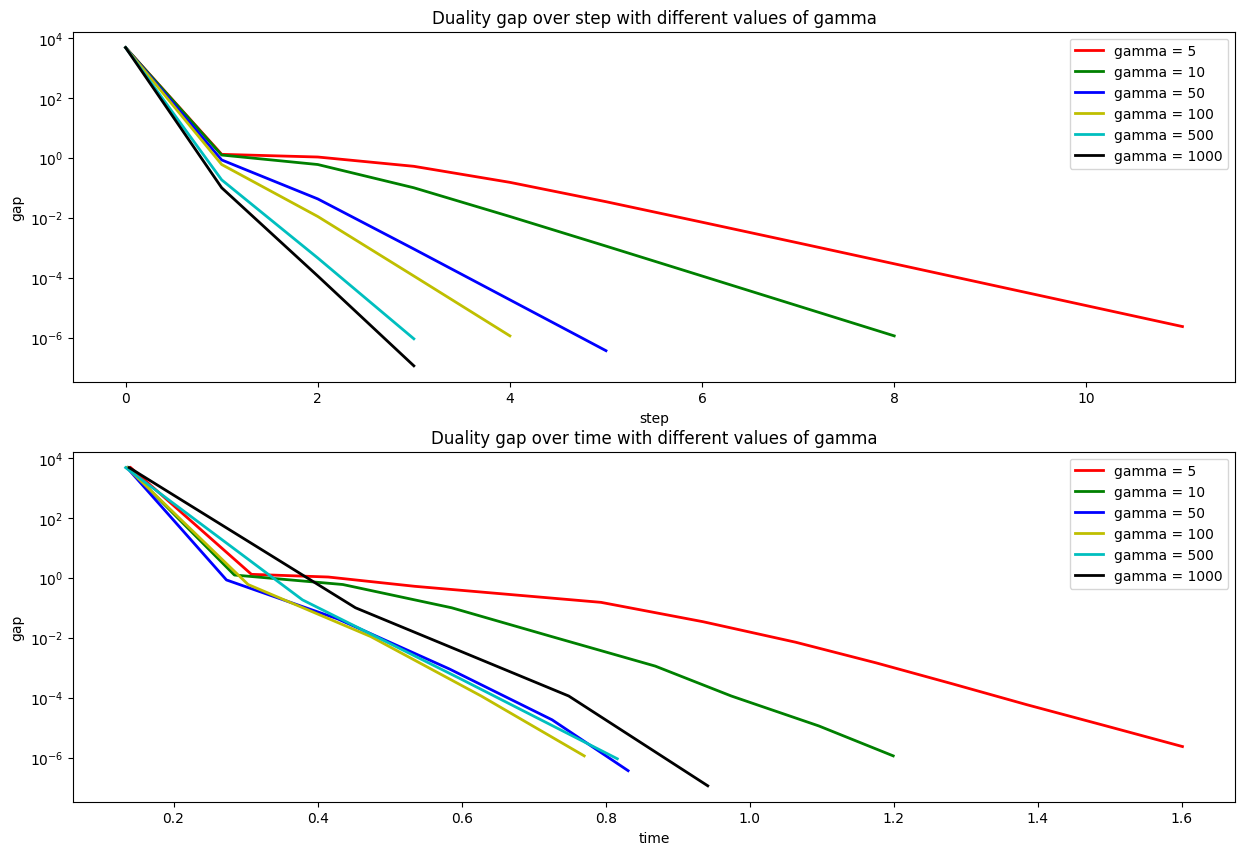

In [10]:
_, axs = plt.subplots(2, 1, figsize=(15, 10))

gammas = [5, 10, 50,100, 500, 1000]
colors = ['r', 'g', 'b', 'y', 'c', 'k', 'purple']
plt.sca(axs[0])
for gamma, color in zip(gammas, colors):
    gaps = []
    times = []
    _, _, history = barrier_method_lasso(A, b, 0.1, x_0, x_0+epsilon, gamma=gamma, trace=True)
    gaps.append(history['duality_gap'])
    plt.plot(np.arange(len(history['duality_gap'])), history['duality_gap'], color=color, linewidth=2, label='gamma = ' + str(gamma))

plt.xlabel('step')
plt.ylabel('gap')
plt.title('Duality gap over step with different values of gamma')
plt.legend()
plt.yscale('log')

gammas = [5, 10, 50,100, 500, 1000]
colors = ['r', 'g', 'b', 'y', 'c', 'k', 'purple']
plt.sca(axs[1])
for gamma, color in zip(gammas, colors):
    gaps = []
    times = []
    _, _, history = barrier_method_lasso(A, b, 0.1, x_0, x_0+epsilon, gamma=gamma, trace=True)
    gaps.append(history['duality_gap'])
    plt.plot(history['time'], history['duality_gap'], color=color, linewidth=2, label='gamma = ' + str(gamma))

plt.xlabel('time')
plt.ylabel('gap')
plt.title('Duality gap over time with different values of gamma')
plt.legend()
plt.yscale('log')

plt.show()

    

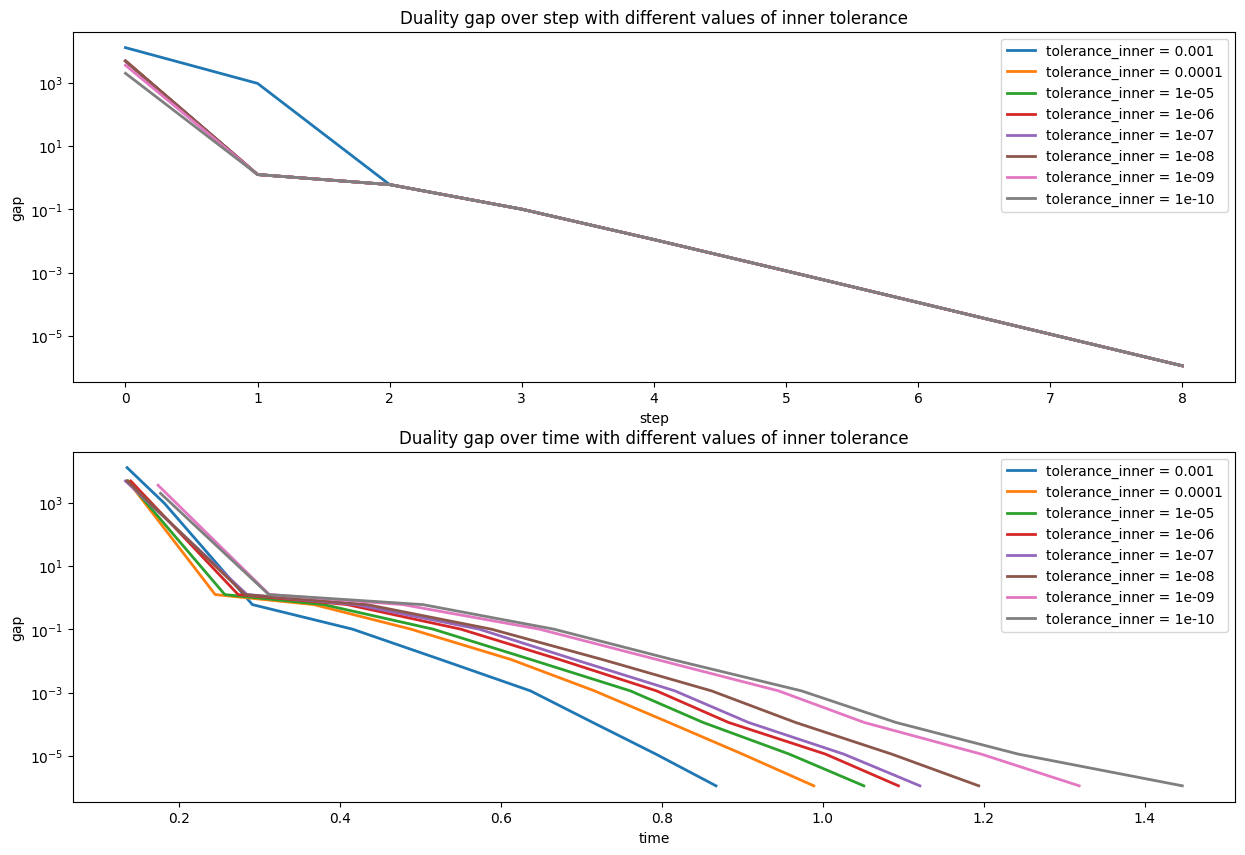

In [11]:
_, axs = plt.subplots(2, 1, figsize=(15, 10))

tolerances_inner = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
cmap = plt.get_cmap('tab10')
plt.sca(axs[0])
for i, tolerance_inner in enumerate(tolerances_inner):
    gaps = []
    times = []
    _, _, history = barrier_method_lasso(A, b, 0.1, x_0, x_0+epsilon, tolerance_inner=tolerance_inner, trace=True)
    gaps.append(history['duality_gap'])
    plt.plot(np.arange(len(history['duality_gap'])), history['duality_gap'], color=cmap(i), linewidth=2, label='tolerance_inner = ' + str(tolerance_inner))

plt.xlabel('step')
plt.ylabel('gap')
plt.title('Duality gap over step with different values of inner tolerance')
plt.legend()
plt.yscale('log')

tolerances_inner = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
cmap = plt.get_cmap('tab10')
plt.sca(axs[1])
for i, tolerance_inner in enumerate(tolerances_inner):
    gaps = []
    times = []
    _, _, history = barrier_method_lasso(A, b, 0.1, x_0, x_0+epsilon, tolerance_inner=tolerance_inner, trace=True)
    gaps.append(history['duality_gap'])
    plt.plot(history['time'], history['duality_gap'], color=cmap(i), linewidth=2, label='tolerance_inner = ' + str(tolerance_inner))

plt.xlabel('time')
plt.ylabel('gap')
plt.title('Duality gap over time with different values of inner tolerance')
plt.legend()
plt.yscale('log')
plt.show()
    